In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
import keras.backend as K
# %pip install tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping

c:\Users\adity\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
df = pd.read_csv('../../Dataset/cleaned_used_cars_v2.csv')

In [4]:
df.shape

(351044, 12)

In [5]:
# dummies = pd.get_dummies(df.drop(['dateCrawled','lastSeen','dateCreated','name'], axis=1), columns=['seller', 'offerType','abtest','vehicleType','gearbox','model','fuelType','brand','notRepairedDamage'])
# df_preprocessed = pd.concat([df.drop(['price','index','dateCrawled','lastSeen','yearOfRegistration','monthOfRegistration','nrOfPictures','postalCode',
#              'name','seller','offerType','abtest','vehicleType','gearbox','model','fuelType','brand','notRepairedDamage','dateCreated'], axis=1),
#                              dummies], axis=1)
onehot_columns = ['abtest','vehicleType','gearbox','model','fuelType','brand','notRepairedDamage']
onehot_df = df[onehot_columns]
onehot_df = pd.get_dummies(onehot_df, columns = onehot_columns)
score_onehot_drop = df.drop(onehot_columns, axis = 1)
score_onehot = pd.concat([score_onehot_drop, onehot_df], axis = 1)
df_preprocessed = score_onehot

In [6]:
df_preprocessed

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,abtest_control,abtest_test,vehicleType_bus,vehicleType_compact car,vehicleType_convertible,...,brand_skoda,brand_smart,brand_subaru,brand_suzuki,brand_toyota,brand_trabant,brand_volkswagen,brand_volvo,notRepairedDamage_no,notRepairedDamage_yes
0,480,1993,0,150000,0,0,1,0,0,1,...,0,0,0,0,0,0,1,0,0,1
1,9800,2004,163,125000,8,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,1500,2001,75,150000,6,0,1,0,1,0,...,0,0,0,0,0,0,1,0,1,0
3,3600,2008,69,90000,7,0,1,0,1,0,...,1,0,0,0,0,0,0,0,1,0
4,650,1995,102,150000,10,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
351039,0,2005,0,150000,7,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
351040,1199,2000,101,125000,3,0,1,0,0,1,...,0,1,0,0,0,0,0,0,1,0
351041,9200,1996,102,150000,3,0,1,1,0,0,...,0,0,0,0,0,0,1,0,1,0
351042,3400,2002,100,150000,6,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1


In [7]:
def r2(y_true, y_pred):
    SS_res =  K.sum(K.square(y_true - y_pred)) 
    SS_tot = K.sum(K.square(y_true - K.mean(y_true))) 
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

In [15]:
X = df_preprocessed.astype(float).to_numpy()
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
# model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
# model.add(Dropout(0.3))
model.add(Dense(16, activation='relu'))
# model.add(Dropout(0.1))
model.add(Dense(1))

print('--------------------Compile------------------------------------')
model.compile(optimizer='adam', loss='mse', metrics=['mae',r2])

early_stop = EarlyStopping(monitor='val_loss', patience=100, verbose=1)

print('--------------------Fit------------------------------------')
history = model.fit(X_train, y_train, validation_split=0.2, batch_size=1000, epochs=1000)

print('--------------------Evaluate------------------------------------')
score = model.evaluate(X_test, y_test)
print(f'Deep Learning Regression Mean Absolute Error: {score[1]:.2f}')
print(f'Deep Learning Regression R-squared Score: {score[2]:.2f}')

--------------------Compile------------------------------------
--------------------Fit------------------------------------
Epoch 1/1000
225/225 [==============================] - 3s 7ms/step - loss: 153150095360.0000 - mae: 6532.3843 - r2: 0.3175 - val_loss: 59168440320.0000 - val_mae: 2764.8545 - val_r2: 0.9495
Epoch 2/1000
225/225 [==============================] - 1s 6ms/step - loss: 4472981504.0000 - mae: 940.6232 - r2: 0.9778 - val_loss: 6673247.0000 - val_mae: 340.2104 - val_r2: 0.9936
Epoch 3/1000
225/225 [==============================] - 1s 6ms/step - loss: 3568216.2500 - mae: 179.7469 - r2: 0.9965 - val_loss: 11831807.0000 - val_mae: 146.3901 - val_r2: 0.9984
Epoch 4/1000
225/225 [==============================] - 1s 6ms/step - loss: 3403015.7500 - mae: 114.2206 - r2: 0.9986 - val_loss: 671465.6875 - val_mae: 79.6812 - val_r2: 0.9991
Epoch 5/1000
225/225 [==============================] - 1s 7ms/step - loss: 24959386.0000 - mae: 170.6341 - r2: 0.9989 - val_loss: 114692432.00

KeyboardInterrupt: 

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                20288     
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dense_3 (Dense)             (None, 1)                 17        
                                                                 
Total params: 22,913
Trainable params: 22,913
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.get_weights()

[array([[ 1.8812556e-06, -5.9329945e-04,  1.2435070e-01, ...,
         -2.3970709e-03, -8.1263501e-03, -1.0845454e-02],
        [-6.5806307e-02,  8.4928371e-02,  3.1245353e-03, ...,
         -1.4011317e-01,  5.0445211e-01, -1.9717367e-02],
        [-1.7136709e-01, -5.4732185e-02, -1.7468765e-01, ...,
         -9.8088570e-02,  5.4040271e-01, -1.0358095e-02],
        ...,
        [-1.3708153e-01,  3.2392298e-03, -1.2103008e-01, ...,
         -5.5920776e-02,  1.6018364e-01,  6.2121670e-03],
        [-1.3793924e-01, -1.6302740e-02, -1.8942900e-01, ...,
         -1.3537692e-01,  8.2548904e-01,  7.4979424e-02],
        [-4.1550837e-02, -9.6092209e-02,  3.3048273e-03, ...,
         -2.0267123e-01, -3.8889718e-01,  4.4347581e-02]], dtype=float32),
 array([-0.07179168, -0.01944937, -0.0023473 ,  0.        , -0.06512003,
         0.17667818, -0.0778656 , -0.20759584, -0.01405933, -0.014999  ,
         0.06154611,  0.        ,  0.        ,  0.05271667,  0.04518795,
        -0.01655766, -0.2438895

In [11]:
predictions = model.predict(X_test)

# Print the predicted prices
print(predictions)

2195/2195 [==============================] - 4s 2ms/step
[[ 3944.6628]
 [ 1464.3188]
 [ 9251.315 ]
 ...
 [  989.4679]
 [14385.709 ]
 [  626.8532]]


In [12]:
y_test

241094     3999
16732      1500
81570      9500
138521     2400
95085       999
          ...  
316024    14300
159118     2000
241770     1000
158515    14500
233281      670
Name: price, Length: 70209, dtype: int64

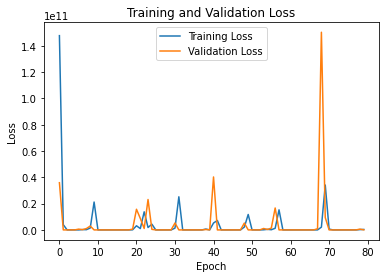

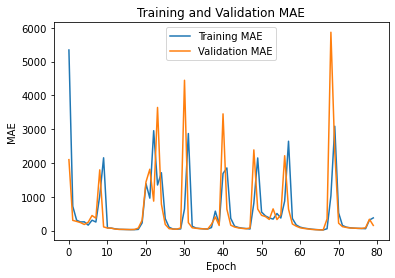

In [13]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.show()

plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('Training and Validation MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend(['Training MAE', 'Validation MAE'])
plt.show()